In [71]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
##################################################
# GNU Radio Python Flow Graph
# Title: MOD_4_OOK_Demod_qt
# Author: Jon Munson
# Description: This demodulated OOK RAW file to a binary sliced file
# Generated: Mon Oct 22 16:43:53 2018
##################################################

#!wget https://gitlab.com/jumson/sdr-samples/raw/master/SolidRemote/solidremote_433_8000000_1
    
from gnuradio import blocks
from gnuradio import digital
from gnuradio import eng_notation
from gnuradio import filter
from gnuradio import gr
from gnuradio.eng_option import eng_option
from gnuradio.filter import firdes
from optparse import OptionParser

import numpy as np
import matplotlib.pyplot as plt


import ipywidgets as widgets

In [75]:
# infile = "./solidremote_433_8000000_1.raw"
infile ="./solidremote_433_8000000_1"
outfile = "./SolidRx.again.sliced"

In [76]:
class MOD_4_OOK_Demod(gr.top_block):

    def __init__(self):
        gr.top_block.__init__(self, "MOD_4_OOK_Demod_qt")

        ##################################################
        # Variables
        ##################################################
        self.working_samp_rate = working_samp_rate = 400000
        self.samp_rate = samp_rate = 8e6
        self.threshold = threshold = .025
        self.offset = offset = 950000
        self.filter_transition = filter_transition = 10e3
        self.filter_decimation = filter_decimation = int(samp_rate/working_samp_rate)
        self.filter_cutoff = filter_cutoff = 100e3
        self.filename_sliced = filename_sliced = outfile
        self.filename_raw_rx = filename_raw_rx = infile

        ##################################################
        # Blocks
        ##################################################
        self.throttle = blocks.throttle(gr.sizeof_gr_complex*1, working_samp_rate,True)
        self.multiply_constant = blocks.multiply_const_vcc((4, ))
        self.freq_xlating_fir_filter = filter.freq_xlating_fir_filter_ccc(filter_decimation, (firdes.low_pass(1, samp_rate, filter_cutoff, filter_transition)), offset, samp_rate)
        self.file_source = blocks.file_source(gr.sizeof_gr_complex*1, filename_raw_rx, False)
        self.file_sink_0 = blocks.file_sink(gr.sizeof_float*1, filename_sliced, False)
        self.file_sink_0.set_unbuffered(False)
        self.digital_binary_slicer = digital.binary_slicer_fb()
        self.complex_to_mag_squared = blocks.complex_to_mag_squared(1)
        self.blocks_uchar_to_float_0 = blocks.uchar_to_float()
        self.add_const = blocks.add_const_vff((-1*threshold, ))

        ##################################################
        # Connections
        ##################################################
        self.connect((self.add_const, 0), (self.digital_binary_slicer, 0))
        self.connect((self.blocks_uchar_to_float_0, 0), (self.file_sink_0, 0))
        self.connect((self.complex_to_mag_squared, 0), (self.add_const, 0))
        self.connect((self.digital_binary_slicer, 0), (self.blocks_uchar_to_float_0, 0))
        self.connect((self.file_source, 0), (self.freq_xlating_fir_filter, 0))
        self.connect((self.freq_xlating_fir_filter, 0), (self.throttle, 0))
        self.connect((self.multiply_constant, 0), (self.complex_to_mag_squared, 0))
        self.connect((self.throttle, 0), (self.multiply_constant, 0))

    def get_working_samp_rate(self):
        return self.working_samp_rate

    def set_working_samp_rate(self, working_samp_rate):
        self.working_samp_rate = working_samp_rate
        self.set_filter_decimation(int(self.samp_rate/self.working_samp_rate))
        self.throttle.set_sample_rate(self.working_samp_rate)

    def get_samp_rate(self):
        return self.samp_rate

    def set_samp_rate(self, samp_rate):
        self.samp_rate = samp_rate
        self.set_filter_decimation(int(self.samp_rate/self.working_samp_rate))
        self.freq_xlating_fir_filter.set_taps((firdes.low_pass(1, self.samp_rate, self.filter_cutoff, self.filter_transition)))

    def get_threshold(self):
        return self.threshold

    def set_threshold(self, threshold):
        self.threshold = threshold
        print("threshold changed to "+str(threshold))
        self.add_const.set_k((-1*self.threshold, ))

    def get_offset(self):
        return self.offset

    def set_offset(self, offset):
        self.offset = offset
        self.freq_xlating_fir_filter.set_center_freq(self.offset)

    def get_filter_transition(self):
        return self.filter_transition

    def set_filter_transition(self, filter_transition):
        self.filter_transition = filter_transition
        self.freq_xlating_fir_filter.set_taps((firdes.low_pass(1, self.samp_rate, self.filter_cutoff, self.filter_transition)))

    def get_filter_decimation(self):
        return self.filter_decimation

    def set_filter_decimation(self, filter_decimation):
        self.filter_decimation = filter_decimation

    def get_filter_cutoff(self):
        return self.filter_cutoff

    def set_filter_cutoff(self, filter_cutoff):
        self.filter_cutoff = filter_cutoff
        self.freq_xlating_fir_filter.set_taps((firdes.low_pass(1, self.samp_rate, self.filter_cutoff, self.filter_transition)))

    def get_filename_sliced(self):
        return self.filename_sliced

    def set_filename_sliced(self, filename_sliced):
        self.filename_sliced = filename_sliced
        self.file_sink.open(self.filename_sliced)

    def get_filename_raw_rx(self):
        return self.filename_raw_rx

    def set_filename_raw_rx(self, filename_raw_rx):
        self.filename_raw_rx = filename_raw_rx
        self.file_source.open(self.filename_raw_rx, False)


In [77]:
#def main(top_block_cls=MOD_4_OOK_Demod, options=None):

#    tb = top_block_cls()
#    tb.start()
#    tb.wait()


#if __name__ == '__main__':
#    main()

In [78]:
my_radio = MOD_4_OOK_Demod()

In [79]:
print(my_radio.get_threshold())
print(my_radio.get_offset())

0.025
950000


In [91]:
#my_radio.wait()
my_radio.start()
my_radio.wait()


In [92]:
print(my_radio.get_offset())

950000


In [93]:
mydat=dat = np.fromfile(outfile, dtype="float32")
print('sliced data len ' + str(len(mydat)))
out = widgets.Output(layout={'border': '1px solid black'})

sliced data len 2535424


In [105]:
def show_plot():
    signal_name = 'The_Sliced_SolidRemote_Signal_'
    # the x axis will be each value --
    x = range(len(mydat))
    # the y axis is dat 
    plt.figure(figsize=(20,5))
    # the x axis will be each value --
    lefty = slice_left.value
    righty = slice_right.value
    x = range(len(mydat[lefty:righty]))
    # the y axis is mydat 
    plt.figure(figsize=(20,5))
    #plt.scatter(x,mydat[lefty:righty])
    plt.plot(x,mydat[lefty:righty])
    plt.title(signal_name)
    plt.savefig('./saved.jpg', bbox_inches='tight', pad_inches=0.5)
    with out:
        plt.show() 

In [102]:
def show_controls(b=None):
    with out:
        display(threshold_val,threshold_val_text, slice_left,slice_left_text,slice_right,slice_right_text, button, clear_button)

In [103]:
import ipywidgets as widgets
slice_left = widgets.IntSlider(
    value=100,
    min=0,
    max=len(mydat),
    step=1,
    description='Left Slice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=False,
    readout_format='d'
)
slice_left_text = widgets.IntText(
    value=100,
    description='',
    disabled=False
)
left_link = widgets.jslink((slice_left, 'value'), (slice_left_text, 'value'))

slice_right = widgets.IntSlider(
    value=int(len(mydat)/2),
    min=0,
    max=len(mydat),
    step=1,
    description='Right Slice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=False,
    readout_format='d'
)
slice_right_text = widgets.IntText(
    value=int(len(mydat)/2),
    description='',
    disabled=False
)
right_link = widgets.jslink((slice_right, 'value'), (slice_right_text, 'value'))

threshold_val = widgets.FloatSlider(
    value=.25,
    min=0,
    max=1,
    step=0.025,
    description='Threshold of Binary Slice:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=False,
    readout_format='.3f',
)
threshold_val_text = widgets.FloatText(
    value=.25,
    description='',
    disabled=False
)
threshold_link = widgets.jslink((threshold_val, 'value'), (threshold_val_text, 'value'))

button = widgets.Button(
    description='Plot',
)

clear_button = widgets.Button(
    description='Clear',
)

@button.on_click
def plot_on_click(b):
    show_plot()
    
@clear_button.on_click
def plot_on_click(b):
    out.clear_output()
    show_controls()

In [106]:
out

Output(layout=Layout(border='1px solid black'), outputs=({'output_type': 'display_data', 'data': {'text/plain'…

In [107]:
show_controls()

<Figure size 1440x360 with 0 Axes>

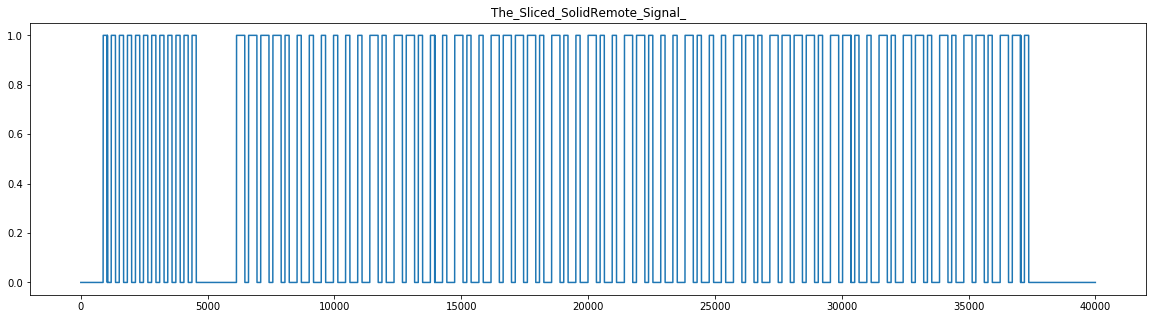

In [108]:
signal_name = 'The_Sliced_SolidRemote_Signal_'
# the x axis will be each value --
x = range(len(mydat))
# the y axis is dat 
plt.figure(figsize=(20,5))
# the x axis will be each value --
lefty = slice_left.value
righty = slice_right.value
x = range(len(mydat[lefty:righty]))
# the y axis is mydat 
plt.figure(figsize=(20,5))
#plt.scatter(x,mydat[lefty:righty])
plt.plot(x,mydat[lefty:righty])
plt.title(signal_name)
plt.savefig('./saved.jpg', bbox_inches='tight', pad_inches=0.5)

In [100]:
# push the sliced data to file representing one burst
# y.tofile('./g_switch_cut_filtered_8m_433_centered.iq')
print(slice_left.value)
print(slice_right.value)
mydat.tofile('./Solid_Remote_01_345k-385k.again.slice')

345000
385000


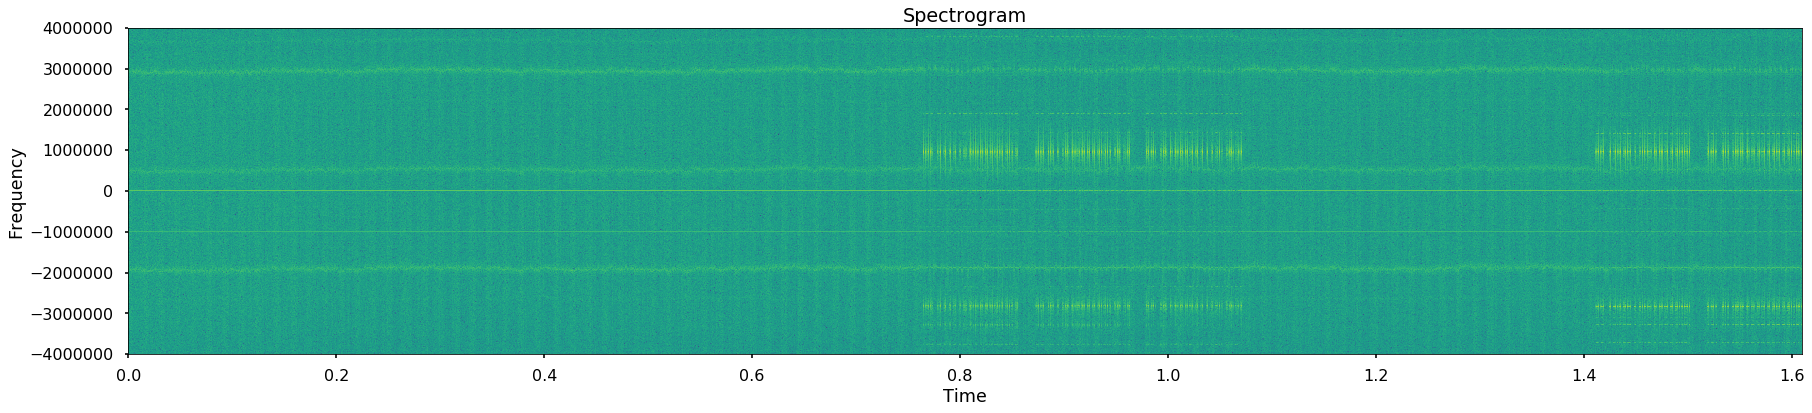

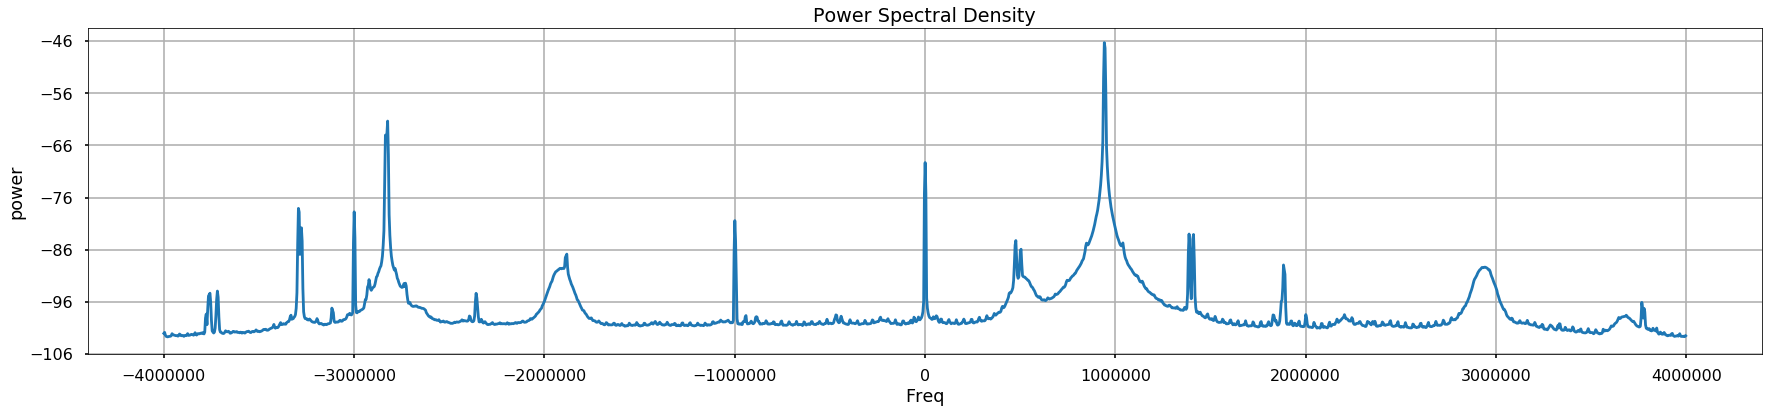

In [171]:
samp_rate = Fs = 8e6
# so I can mnake my adjustmens in seconds
lefts= int(samp_rate*.1)
rights = int(left + samp_rate*.21)
see_spec(dat=my_raw_dat[lefts:rights])
see_psd(dat=my_raw_dat[lefts:rights])

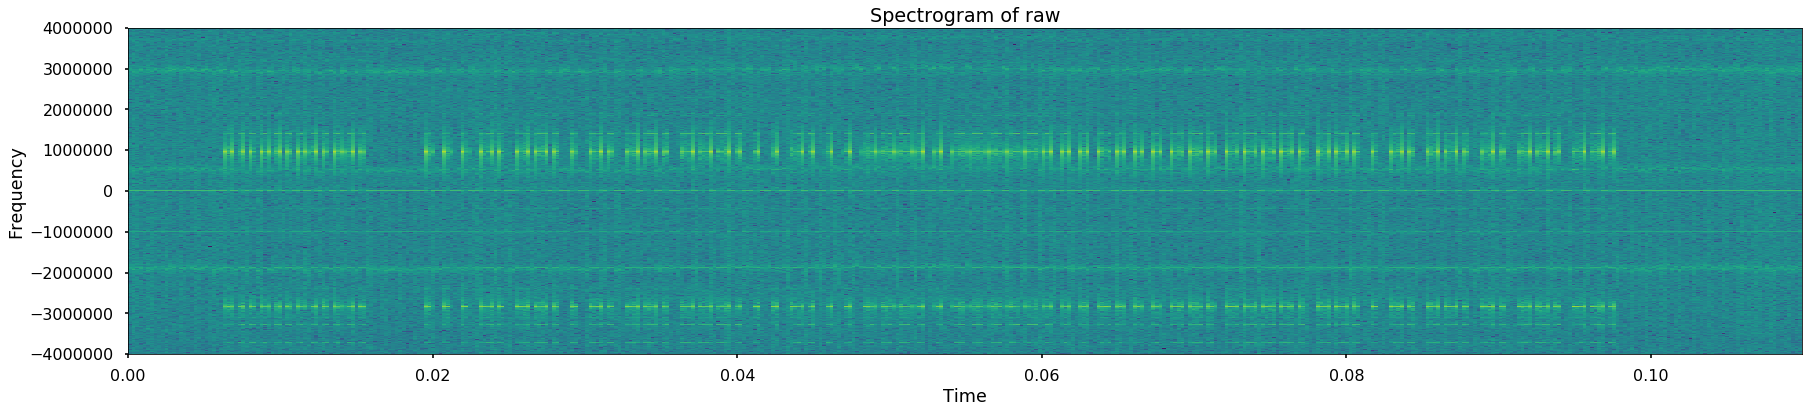

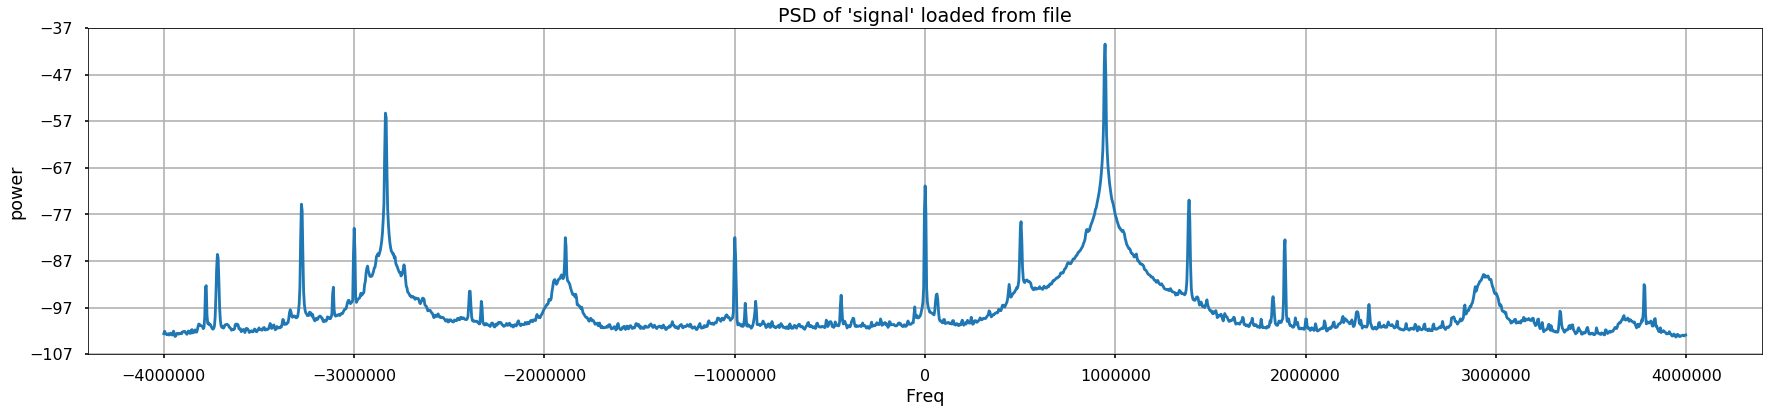

In [151]:
samp_rate = Fs = 8e6
# so I can mnake my adjustmens in seconds
lefts= int(samp_rate*1.505)
rights = int(lefts + samp_rate*.11)
see_spec(dat=my_raw_dat[lefts:rights])
see_psd(dat=my_raw_dat[lefts:rights])

In [110]:
# shift it...
shift = 950000
# To mix the data down, generate a complex exponential 
# with phase -f_shift/Fs
fc = np.exp(-1.0j*2.0*np.pi* shift/Fs*np.arange(len(my_raw_dat[lefts:rights])))
# Try plotting this complex exponential with a scatter plot of the complex plan - 
# what do you expect it to look like?
y = my_raw_dat[lefts:rights] * fc


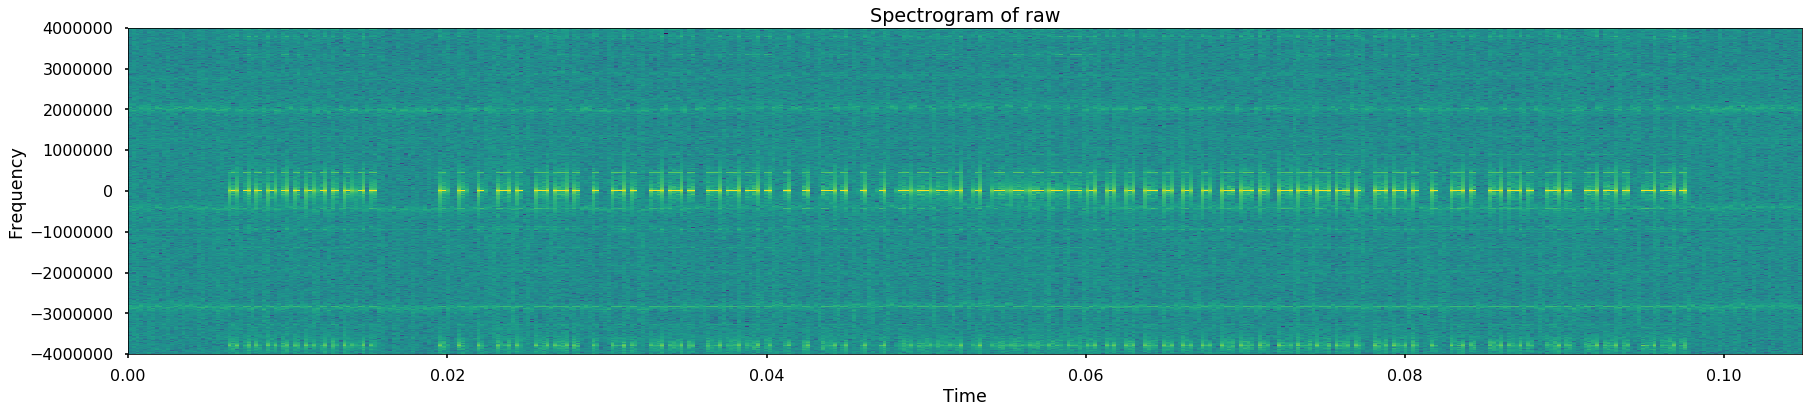

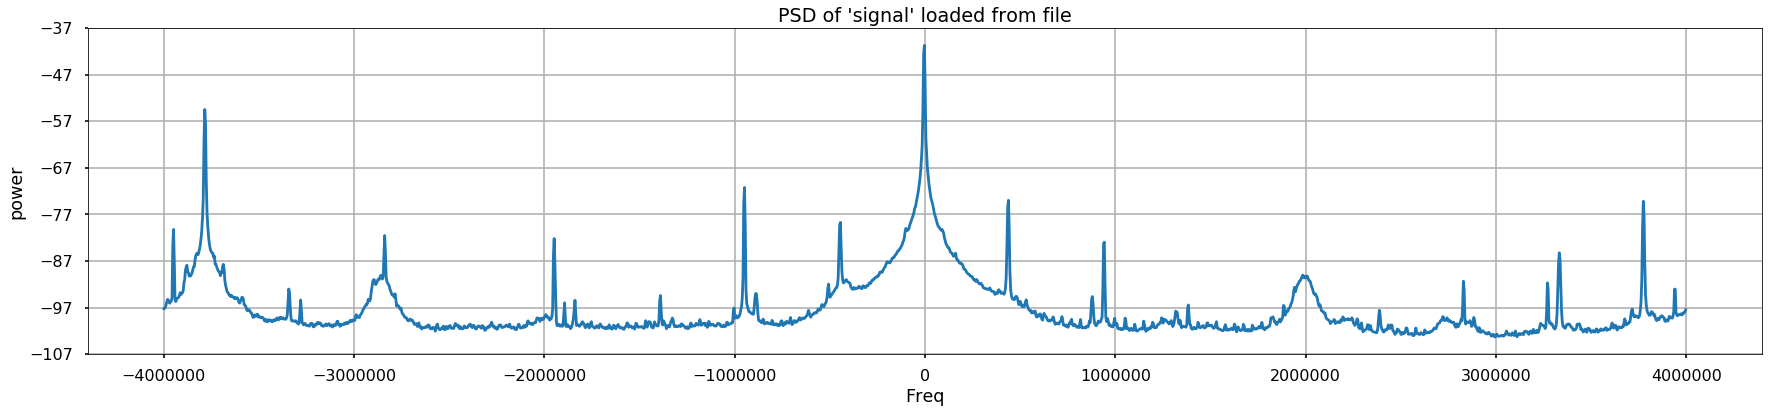

In [111]:
see_spec(dat=y)
see_psd(dat=y)

In [115]:
# push the shifted and sliced samples back out to a file
y.tofile('./g_switch_cut_filtered_8m_433_centered.iq')
len(y)
# cent_dat.tofile(filename+'.cut.iq')

840000